<center> <h5>Wintersemester 2024/25</h5> </center>
<center> <h1>Medizinische Bildanalyse</h1> </center>
<center> <h3>Aufgabenblatt 3</h3> </center>
<center> <h5>28. Oktober 2024</h5> </center>
<center> <h5>
    Prof. Dr. Thomas Schultz, 
    <a href = "mailto: jlen@uni-bonn.de">Jonathan Lennartz</a>,
    <a href = "mailto: jgruen@uni-bonn.de">Dr. Johannes Grün</a>
</h5> </center>
<center> <h5>Abgabefrist: <b>04.11.2022, 10:00 Uhr, via eCampus</b></h5> </center>
</br>

* Bei Fragen bezüglich der Aufgaben nutzt das Forum in eCampus
* Die Aufgaben können in Gruppen von **bis zu drei** Studierenden abgegeben werden (eine Abgabe pro Gruppe). Findet euch dazu auf eCampus in Teams zusammen.
* Ladet die Abgaben in einem Zip-Archiv hoch. Es sollte das Notebook selbst, einen Export als HTML oder PDF und alle nötigen Datein enthalten, um die Ergebnisse zu reproduzieren. 
</br>
</br>
</br>
</br>

### Aufgabe 1 (DFT und FFT, 20 Punkte)

a) In der Vorlesung wurde die Fourier-Transformation für diskrete Signale definiert als
$$X_k=\sum_{n=0}^{N-1}e^{-2\pi i k(n/N)}x_n \text{ for } k = 0, \dots , N- 1$$
für eine Reihe $x \in \mathbb{R}^N$ (oder $\mathbb{C}^N$). Zeigt, dass  
$$x_n=\frac{1}{N}\sum_{k=0}^{N-1}e^{2\pi i k(n/N)}X_k$$
die Inverse der DFT beschreibt. (5P)

_Tipp: Denkt an folgende Formel für Partialsummen der geometrischen Reihe:_
$ \sum_{k=0}^{n-1} a r^k = a \left( \frac{1 - r^{n}}{1-r} \right)$
</br>

_Lösung:_


Wir beginnen mit der Inversionsformel der DFT:

$x_n = \frac{1}{N} \sum_{k=0}^{N-1} \exp\left(2 \pi i \frac{k n}{N}\right) X_k$

Nun setzen wir $X_k = \sum_{m=0}^{N-1} e^{-2\pi i \frac{k m}{N}} x_m$ in diese Gleichung ein:

$x_n = \frac{1}{N} \sum_{k=0}^{N-1} e^{2 \pi i \frac{k n}{N}} \left( \sum_{m=0}^{N-1} e^{-2 \pi i \frac{k m}{N}} x_m \right)$

Wir können die Summen vertauschen, da es sich um endliche Summen handelt:

$x_n = \frac{1}{N} \sum_{m=0}^{N-1} x_m \sum_{k=0}^{N-1} e^{2 \pi i \frac{k n}{N}} e^{-2 \pi i \frac{k m}{N}}$

Nun fassen wir die Exponentialterme zusammen:

$x_n = \frac{1}{N} \sum_{m=0}^{N-1} x_m \sum_{k=0}^{N-1} e^{2 \pi i \frac{k (n - m)}{N}}$

Jetzt betrachten wir die innere Summe separat:

$\sum_{k=0}^{N-1} e^{2 \pi i \frac{k (n - m)}{N}}$

Dies ist eine geometrische Reihe. Abhängig davon, ob $n = m$ oder $n \neq m$, gibt es zwei Fälle:

1. Wenn $n = m$:
   $\sum_{k=0}^{N-1} e^{2 \pi i \frac{k (n - m)}{N}} = \sum_{k=0}^{N-1} 1 = N$

2. Wenn $n \neq m$, haben wir eine geometrische Reihe der Form:
   $\sum_{k=0}^{N-1} r^k = \frac{1 - r^N}{1 - r}$
   mit $r = e^{2 \pi i \frac{(n - m)}{N}}$. Da $r^N = e^{2 \pi i (n - m)} = 1$, ergibt sich
   $\sum_{k=0}^{N-1} e^{2 \pi i \frac{k (n - m)}{N}} = \frac{1 - 1}{1 - r} = 0$. Da r $n-m \notin \mathbb{Z}$, also macht der Nenner keine Probleme

Zusammengefasst ergibt sich also:

$\sum_{k=0}^{N-1} e^{2 \pi i \frac{k (n - m)}{N}} = 
\begin{cases}
    N, & \text{wenn } n = m, \\
    0, & \text{wenn } n \neq m.
\end{cases}$

Daraus folgt, dass

$x_n = \frac{1}{N} \sum_{m=0}^{N-1} x_m \cdot N \cdot \delta_{n,m} = x_n$.

Dies zeigt, dass die Inversionsformel tatsächlich $x_n$ exakt rekonstruiert, da nur der Term $m = n$ übrig bleibt.



b) Schreibt eine Python-Funktion, die mittels der Formel aus Teil a) die DFT berechnet. (5P)

In [6]:
# Lösung
import numpy as np
import matplotlib.pyplot as plt


def DFT_1d(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(complex(0, -2 * np.pi * k * n / N))
    
    return X

# Beispiel von https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Example
x = np.array([1, 2 - 1.j, -1.j, -1 + 2.j])
X = DFT_1d(x)
print(X)

[ 2.0000000e+00+0.j -2.0000000e+00-2.j  8.8817842e-16-2.j
  4.0000000e+00+4.j]


c) In der Praxis wird die naive Implemetierung der DFT häufig durch die schnelle Fourier-Transformation (FFT=Fast Fourier Transform) ersetzt, welche Ihr in dieser Aufgabe kennen lernt. 
Im Zentrum der Herleitung steht folgende Symmetrie:  
$$
X_k = \sum_{n=0}^{N-1}  x_n e^{- 2i \pi k \frac{n}{N}}  = \sum_{n=0}^{N-1}  x_n \underbrace{e^{-2i\pi jN \frac{n}{N}}}_{=1} e^{-2i \pi k \frac{n}{N}} = X_{k+jN}\, \forall j \in \mathbb{N}
$$
Sofern man die DFT-Formel also so umstellen kann, dass die Berechnung sowohl $X_k$ wie auch $X_{k+jN}$ enthält, spart man sich die Berechnung einer der beiden Komponenten. Dafür teilt man die DFT-Summe im ersten Schritt in zwei Teile, die jeweils die geraden und ungerade Koeffizienten enthalten:
$$
\begin{align}
X_k & = \sum_{n=0}^{N-1}  x_n e^{- 2i \pi k \frac{n}{N}} \\
& = \sum_{m=0}^{\frac{N}{2}-1}  x_{2m} e^{- 2i \pi k \frac{2m}{N}} + \sum_{m=0}^{\frac{N}{2}-1}  x_{2m+1} e^{- 2i \pi k \frac{2m + 1}{N}} \\
& =  \sum_{m=0}^{\frac{N}{2}-1}  x_{2m} e^{- 2i \pi k \frac{2m}{N}} + e^{-2i \pi \frac{k}{N}}\sum_{m=0}^{\frac{N}{2}-1}  x_{2m+1} e^{- 2i \pi k \frac{2m}{N}} \\
& = X^{\prime}_k + e^{-2i \pi \frac{k}{N}} X^{\prime \prime}_k.
\end{align}
$$
Bedenkt man nun, dass $X^{\prime}_k$ und $X^{\prime \prime}_k$ jeweils wieder DFTs mit Länge $N/2$ beschreiben, lässt sich auch wieder die oben beschriebene Symmetrie anwenden und man erhält $X^{\prime}_k = X^{\prime}_{k+\frac{N}{2}}$ sowie  $X^{\prime \prime}_k = X^{\prime \prime}_{k+\frac{N}{2}}$. Man kann diese Eigenschaft nutzen, um den zweiten Teil der originalen DFT (für $k\geq N/2$) durch den ersten Teil (für $k<N/2$) zu ersetzen und spart so Rechenoperationen. Durch rekursive Anwendung dieser _Divide & Conquer_ Strategie bleibt letztendlich nur ein einziger Summand übrig.
</br>
Implementiert auf Basis dieser Herleitung eine FFT. Es genügt, wenn Eure Funktion 1D-Inputs mit einer Länge von $2^n$ verarbeiten kann. (7P)

In [7]:
def FFT_1d(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    
    N = len(x)
    N_half = int(N / 2)

    if N == 1:
        return x
    else:
        FFT_even = FFT_1d(x[::2])
        FFT_odd = FFT_1d(x[1::2])

        X = np.zeros(N, dtype=complex)

        for k in range(N_half):
            a = FFT_even[k]
            b = np.exp(complex(0, -2 * np.pi * k / N)) * FFT_odd[k]

            X[k] = a + b
            X[k + N_half] = a - b

        return X
    
x = np.array([1, 2 - 1.j, -1.j, -1 + 2.j])
X = FFT_1d(x)
print(X)

[ 2.+0.j -2.-2.j  0.-2.j  4.+4.j]


d) Schreibt eine Routine zur Laufzeiterfassung von Euren DFT- und FFT-Implementierungen. Überlegt euch anschließend Input-Signale verschiedener Länge und visualisiert den Vergleich. (3P)

In [4]:
import timeit

# Euer Code
length = 2**8
def measure_DFT_runtime():
    x = np.random.rand(length) + 1j * np.random.rand(length)
    DFT_1d(x)

def measure_FFT_runtime():
    x = np.random.rand(length) + 1j * np.random.rand(length)
    FFT_1d(x)

DFT_runtime = timeit.timeit(measure_DFT_runtime, number=100)
print("DFT runtime: ", DFT_runtime)

FFT_runtime = timeit.timeit(measure_FFT_runtime, number=100)
print("FFT runtime: ", FFT_runtime)

DFT runtime:  7.061830248999996
FFT runtime:  0.14096416199998885


### Aufgabe 2 (Eigenschaften der Fourier-Transformation, 10 Punkte)

</br>

a) Verschiebungen eines Signals verändern nicht sein Amplitudenspektrum, wohl aber die Phasen. Zeigt folgenden Zusammenhang für die Fourier-Transformation: $f(x - x_0) \longleftrightarrow e^{-i\cdot 2\pi \cdot u\cdot x_0} \cdot F(u)$ (4P)

_Lösung:_

\begin{align*}
    &  \int_{-\infty}^{\infty} f(x - x_0) \, e^{-2 \pi i u x} \, dx \\
    & \text{Setze } x - x_0 = x' \\
    & = \int_{-\infty}^{\infty} f(x') \, e^{-2 \pi i u (x' + x_0)} \, dx' \\
    & = \int_{-\infty}^{\infty} f(x') \, e^{-2 \pi i u x'} \, e^{-2 \pi i u x_0} \, dx' \\
    & = e^{-2 \pi i u x_0} \int_{-\infty}^{\infty} f(x') \, e^{-2 \pi i u x'} \, dx' \\
    & = e^{-2 \pi i u x_0} \cdot F(u). \  \square
\end{align*}


b) Zeigt folgenden Zusammenhang für die Fourier-Transformation, der die Auswirkungen von Ableitungen im Ortsraum auf den Frequenzraum beschreibt: $\frac{\delta}{\delta x}f(x) \longleftrightarrow i\cdot 2\pi \cdot u \cdot F(u)$ (4P)

_Lösung:_

\begin{align*}

\mathcal{F} \left\{ \frac{\partial}{\partial x} f(x) \right\}
&= \int_{-\infty}^\infty \left( \frac{\partial}{\partial x} f(x) \right) \cdot \exp(-2 \pi i u x) \mathrm{d} x \text{ | Partielle Integration} \\
&= \left[ f(x) \cdot \exp(-2 \pi i u x) \right]_{-\infty}^\infty - \int_{-\infty}^\infty f(x) \cdot (-2 \pi i u) \cdot \exp(-2 \pi i u x) \mathrm{d} x \\
&= 2 \pi i u \cdot \int_{-\infty}^\infty f(x) \cdot \exp(-2 \pi i u x) \mathrm{d} x \\
&= i \cdot 2 \pi \cdot u \cdot F(u)

\end{align*}

Damit der erste Term nach der partiellen Integration wegfällt, nehmen wird an, dass $f(x)$ für $x \to \pm \infty$ gegen 0 geht.

c) In Kapitel 1 wurde klar, wie wichtig es ist, verrauschte Bilder vor der Berechnung von Ableitungen zu glätten. Erläutert, inwiefern die Formel in b) uns das noch einmal vor Augen führt. (2P)

_Lösung:_

</br>

### Aufgabe 3 (Bildfilterung im Frequenzraum, 20 Punkte)


<figure align="center">
  <img alt="Brain" src="brain.png" width="35%">
    &nbsp; &nbsp; &nbsp; &nbsp;
  <img alt="Brain Log S" src="brain-logps.png" width="35%">
  <figcaption style='margin-left: 25%;font-family: Serif;'>Abbildung: Logarithmisches Amplitudenspektrum einer Kopf-MRT-Aufnahme.</figcaption>
</figure>
</br>

a) Schreibt eine Funktion zur Visualisierung des Amplitudenspektrums eines Graustufenbildes. Logarithmiert die Werte, da sie sehr unterschiedliche Größenordnungen haben. Schneidet sehr kleine Werte geeignet ab. Wendet eure Funktion auf das Bild brain.png an und betrachtet das Ergebnis. Achtet darauf, dass Ihr die Nullfrequenz wie im Beispiel oben im Zentrum darstellt. (6P)

In [2]:
import scipy as sp
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

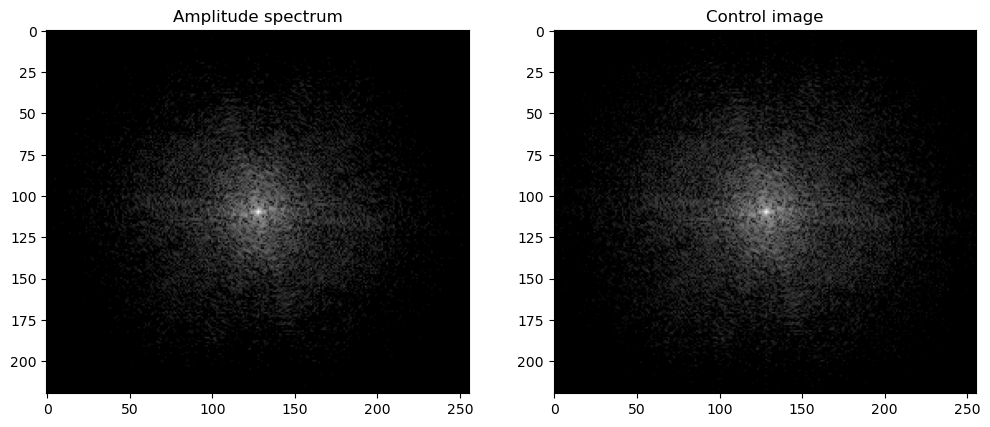

In [8]:
def amplitude_spectrum(img, threshold=8.0):
    # Transformiert img in den Frequenzraum
    img_fft = fft2(img)
    
    # Nutzt die FFT Verschiebung, sodass sich die Nullfrequenz im Zentrum Eures Bildes befindet.
    img_fft_shifted = fftshift(img_fft)
    
    # Nehmt den Logarithmus der Magnitude der komplexen Zahlen.
    fft = np.log(np.absolute(img_fft_shifted))
    
    # Setzt alle Werte unter 8.2 auf genau 8.0, um sehr kleine Werte auf ein bestimmtes Niveau zu bringen.
    fft[np.absolute(fft < 8.2)] = 8.0
    
    # Schneidet alle Werte ab, die unter dem Schwellwert (threshold) liegen.
    fft[fft < threshold] = 0
    return fft

img = ski.io.imread("brain.png")
spectrum = amplitude_spectrum(img)

img_control = ski.io.imread("brain-logps.png")

fig, axes = plt.subplots(1, 2)

axes[0].imshow(spectrum, cmap="gray")
axes[0].set_title("Amplitude spectrum")

axes[1].imshow(img_control, cmap="gray")
axes[1].set_title("Control image")

fig.set_figwidth(12)

plt.show()


b) In der Vorlesung haben wir besprochen, dass die Gauss-Filterung durch Faltung im Bildraum einer punktweisen Multiplikationen mit einer (nicht normierten) Glockenkurve im Frequenzraum entspricht, deren Standardabweichung wir als $\sigma_u := \frac{1}{2\pi \sigma}$ angegeben haben. Implementiert die Gauss-Filterung auf diese Weise, d.h. durch Anwendung der FFT (aus scipy), entsprechender Multiplikation, und Rücktransformation.

Überlegt Euch insbesondere anhand des Frequenzrasters der DFT, welcher konkrete Zahlenwert sich für $\sigma_u$ ergibt, wenn man für $u$ den Abstand der Gitterkoordinaten vom Ursprung des Frequenzraums einsetzt und denselben Effekt erzielen möchte wie ein $\sigma$ von 2 Pixeln im Ortsraum. Wie hängt dieser Wert von Breite bzw. Höhe des Bildes ab? _Tipp: Wenn Breite und Höhe sich unterscheiden, benötigen wir für die beiden Koordinaten im diskreten Frequenzraum unterschiedliche $\sigma_u$._

Vergleicht Euer Ergebnis visuell mit dem Resultat einer Gauss-Filterung mit einem $\sigma$ von 2 Pixeln aus einer beliebigen Python-Bibliothek, z.B. scikit-image. (7P)

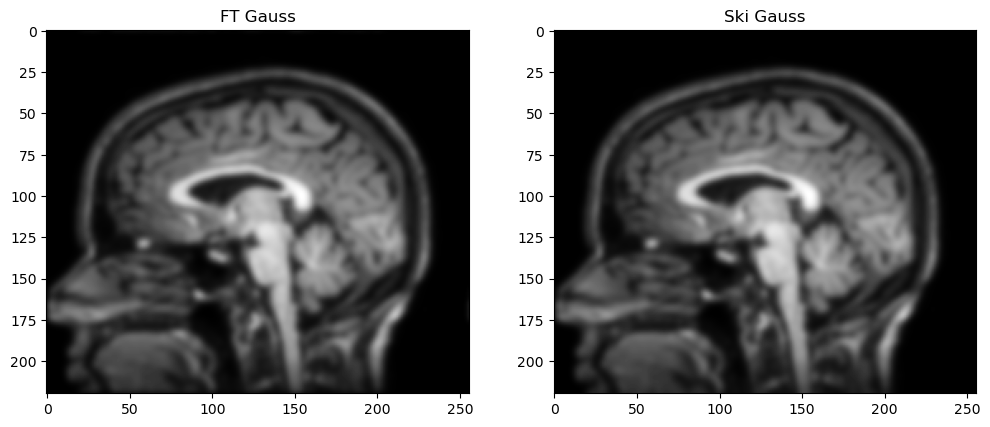

In [22]:
def gauss(img, sigma):
	height, width = img.shape

	# Fourier-Transformation des Bildes berechnen
	ft_img = fft2(img)

	# Frequenzen ins Zentrum shiften
	ft_img = fftshift(ft_img)
	
	for x in range(width):
		for y in range(height):
			# source: https://www.reddit.com/r/okbuddyphd/comments/16k760j/source_it_was_revealed_to_me_in_a_dream/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button
			u = (2 * x - width) / width # im Bereich [-1, 1]
			v = (2 * y - height) / height # im Bereich [-1, 1]

			ft_img[y, x] *= np.exp(-0.5 * (u*u + v*v) * np.pi * np.pi * sigma * sigma)

	# Frequenzen zurückshiften und inverse FFT
	ft_img = ifftshift(ft_img)
	return np.absolute(ifft2(ft_img))
	
s = 2
img_brain = ski.io.imread("brain.png")
ft_filtered_brain = gauss(img_brain, sigma=s)
ski_filtered_brain = ski.filters.gaussian(img_brain, sigma=s)

fig, axes = plt.subplots(1, 2)

fig.set_figwidth(12)

axes[0].imshow(ft_filtered_brain, cmap="gray")
axes[0].set_title("FT Gauss")

axes[1].imshow(ski_filtered_brain, cmap="gray")
axes[1].set_title("Ski Gauss")

plt.show()

c) Überlegt Euch, was passiert, wenn man den Frequenzraum vergrößert, indem man das Ergebnis der FFT symmetrisch um die Nullfrequenz mit Nullen auffüllt (zero padding) und das Ergebnis rücktransformiert. Erläutert, was dabei herauskommen sollte und erklärt kurz warum. (3P)

_Lösung:_

Wenn um die Nullfrequenz Nullen aufgefüllt werden, werden niedrige Frequenzen gelöscht und nur die hohen Frequenzen bleiben übrig. Man würde also erwarten, dass gleichmäßige Stellen im Bild mit wenig Veränderung bzw. sehr ähnlichen Werten verschwinden, während stark variierende Stellen im Bild übrig bleiben.

Das ähnelt einem Hochpassfilter, und somit kann man Zero-Padding als eine Art Kanten-Detektor verwenden.

d) Schreibt eine Funktion, die für ein Eingabebild genau das unter c) beschriebene zero padding implementiert. Visualisiert den Unterschied des ursprünglichen und des resultierenden Bildes geeignet. (4P)

_Lösung:_

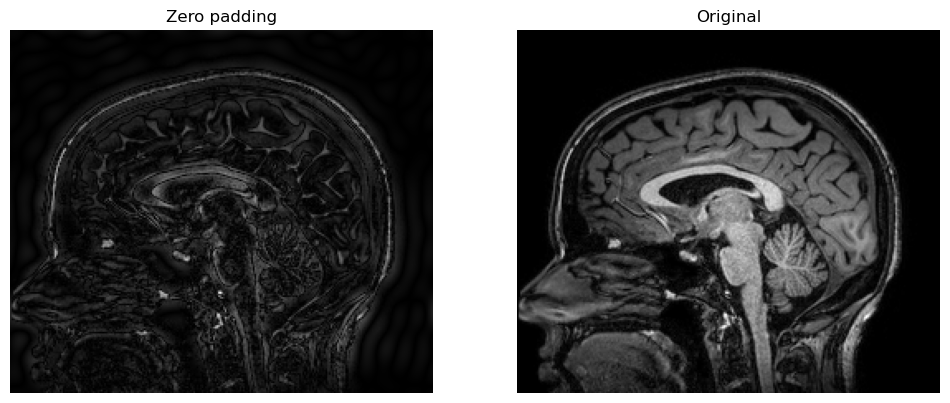

In [4]:
def zero_padding(img, radius):
	# Bild in Frequenzraum transformieren
	ft_brain = fft2(img)
	ft_brain = fftshift(ft_brain)

	height, width = img.shape

	for x in range(width):
		for y in range(height):
			u = (2 * x - width) / width # [-1, 1]
			v = (2 * y - height) / height # [-1, 1]

			# alle Pixel innerhalb des Radius auf 0 setzen
			if (u*u + v*v < radius*radius):
				ft_brain[y, x] = 0 + 0.j

	# zurück in Bildraum transformieren, Komplexe Werte zu Realen Werten transformieren
	return np.absolute(ifft2(ifftshift(ft_brain)))

img_brain = ski.io.imread("brain.png")
zero_padding_img = zero_padding(img_brain, radius=0.1)

fig, axes = plt.subplots(1, 2)

fig.set_figwidth(12)

axes[0].set_title("Zero padding")
axes[0].imshow(zero_padding_img, cmap="gray")
axes[0].axis("off")

axes[1].set_title("Original")
axes[1].imshow(img_brain, cmap="gray")
axes[1].axis("off")

plt.show()

# Viel Glück!